Steven Matthew
2440004445

In [42]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [43]:
img1 = cv2.imread('box.png')  
img2 = cv2.imread('box_in_scene.png') 

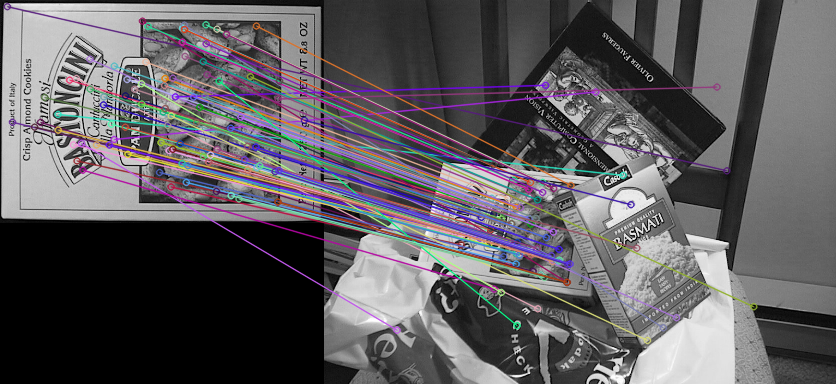

In [44]:
detector = cv2.SIFT_create()
keypoints1, descriptors1 = detector.detectAndCompute(img1, None)
keypoints2, descriptors2 = detector.detectAndCompute(img2, None)


matcher = cv2.DescriptorMatcher_create(cv2.DescriptorMatcher_FLANNBASED)
knn_matches = matcher.knnMatch(descriptors1, descriptors2, 2)

ratio_thresh = 0.8
good_matches = []
for m,n in knn_matches:
    if m.distance < ratio_thresh * n.distance:
        good_matches.append(m)

FLANN = np.empty((max(img1.shape[0], img2.shape[0]), img1.shape[1]+img2.shape[1], 3), dtype=np.uint8)
cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_matches, FLANN, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)    


cv2_imshow(FLANN)

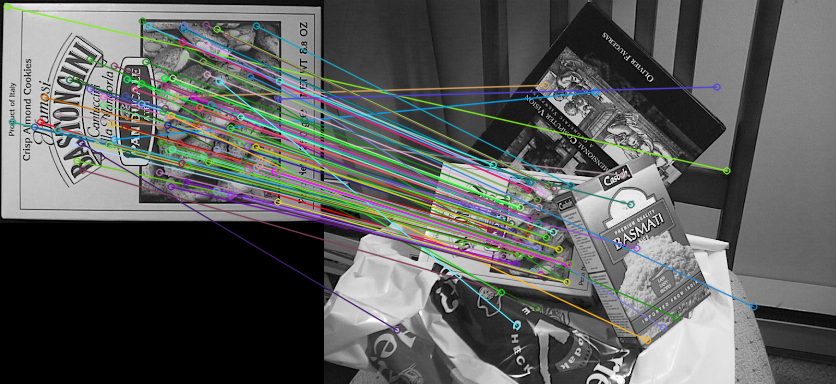

In [45]:
#sift
sift = cv2.SIFT_create()

#feature matching
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)



img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img2,None)

matches = bf.match(descriptors_1,descriptors_2)
matches = sorted(matches, key = lambda x:x.distance)

ratio_thresh = 0.8
good_matches = []
for m,n in knn_matches:
    if m.distance < ratio_thresh * n.distance:
        good_matches.append(m)

BFM = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, good_matches, img2, flags=2)

cv2_imshow(BFM)


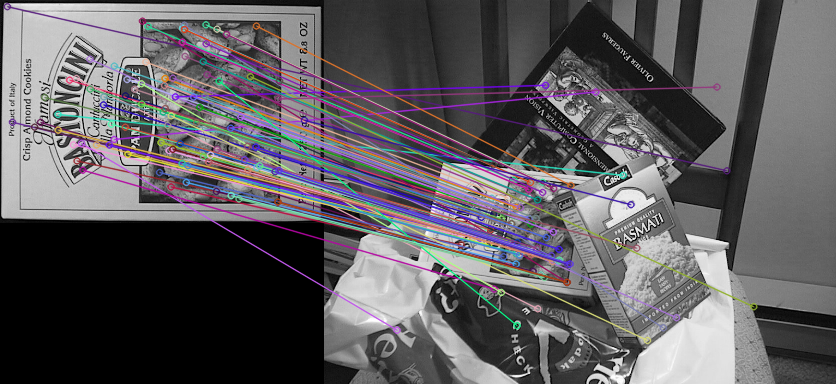

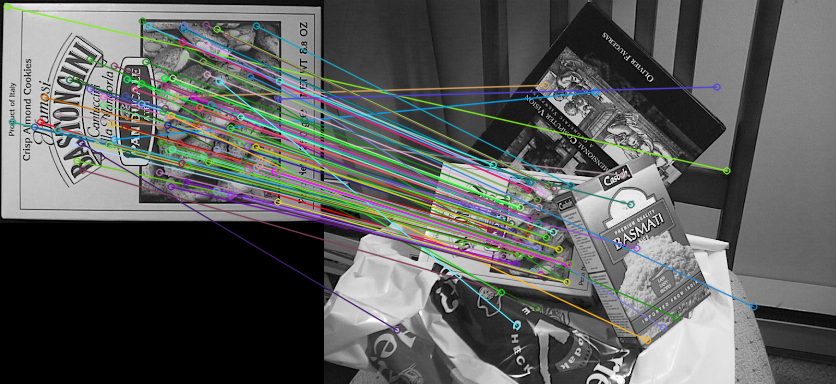

In [46]:
cv2_imshow(FLANN)
cv2_imshow(BFM)

Jika menggunakan ratio test, BFMatcher dan FLANN tidak menunjukkan adanya perbedaan.

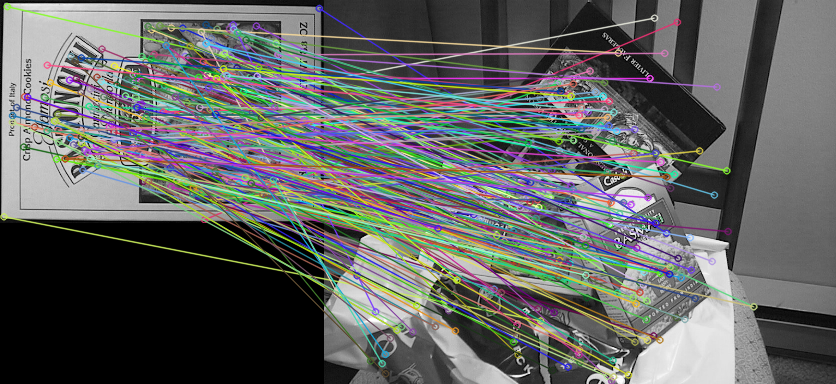

In [41]:
BFM2 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:600], img2, flags=2)

cv2_imshow(BFM2)

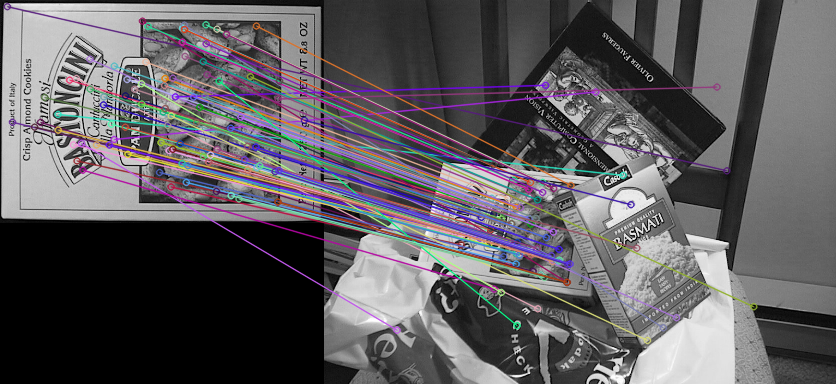

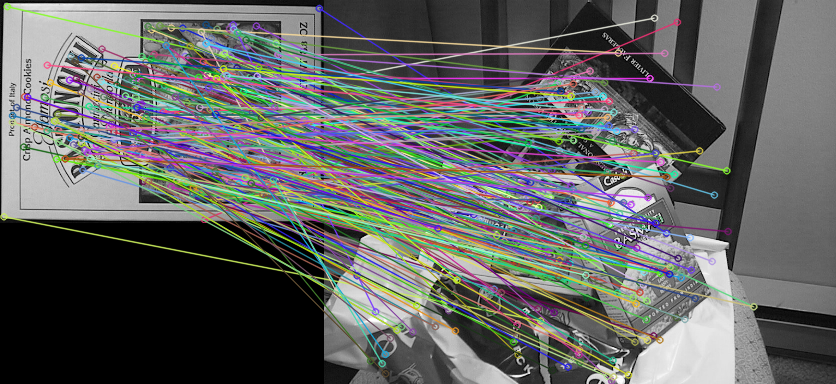

In [47]:
cv2_imshow(FLANN)
cv2_imshow(BFM2)

Jika BFMatchernya tidak menggunakan ratio tapi hanya menggunakan cross-checking hasilnya jauh lebih banyak tapi kita juga harus finetuning manual supaya tidak overconfident dan mengurangi akurasi